In [ ]:
import numpy as np
from depth.model import DepthEucl
from import_data import load_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------------
# Without train test split
# ----------------------------------------------------------
X, y = load_data()
model = DepthEucl().load_dataset(X)
# get depth score on test set
scores = model.projection(X, NRandom=1000)
depth_scores = np.array(scores[0])

# get some informations about depth scores in order to choose a threshold
s_scores = pd.Series(depth_scores)
print(s_scores.describe(percentiles=[0.01, 0.05, 0.10, 0.25]))

# since we know we have arround 4% of outliers in the dataset, we can choose a threshold with 5% percentile
threshold = s_scores.quantile(0.05)
y_pred = (depth_scores < threshold).astype(int)
# evaluate the results

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

# with a threshold of 0.000192, we detect onlu 1 outliers over 10 and we have 11 false positives

# try a loop with some thresholds
# thresholds = s_scores.quantile(
#     [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]
# )
# for t in thresholds:
#     y_pred = (depth_scores < t).astype(int)
#     print(f"Threshold: {t}")
#     print(confusion_matrix(y, y_pred))
#     print(classification_report(y, y_pred))


# The best threshold seems to be 0.00103 with 2 outliers detected over 10 and 14 false positives
# However the results stay bad


# simplicial volume depth
model = DepthEucl().load_dataset(X)

# get depth
scores = model.simplicialVolume(X, exact=False, k=1000)
print(scores)
depth_scores = np.array(scores[0])
# get some informations about depth scores in order to choose a threshold
s_scores = pd.Series(depth_scores)
print(s_scores.describe(percentiles=[0.01, 0.05, 0.10, 0.25]))

threshold = s_scores.quantile(0.1)
print(threshold, " chosen threshold")
y_pred = (depth_scores < threshold).astype(int)
# evaluate the results
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


Columns available : ['att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9', 'att10', 'id', 'outlier']
count    223.000000
mean       0.120148
std        0.096486
min        0.000022
1%         0.000039
5%         0.000192
10%        0.006533
25%        0.029013
50%        0.107457
max        0.378670
dtype: float64
[[202  11]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       213
           1       0.08      0.10      0.09        10

    accuracy                           0.91       223
   macro avg       0.52      0.52      0.52       223
weighted avg       0.92      0.91      0.91       223



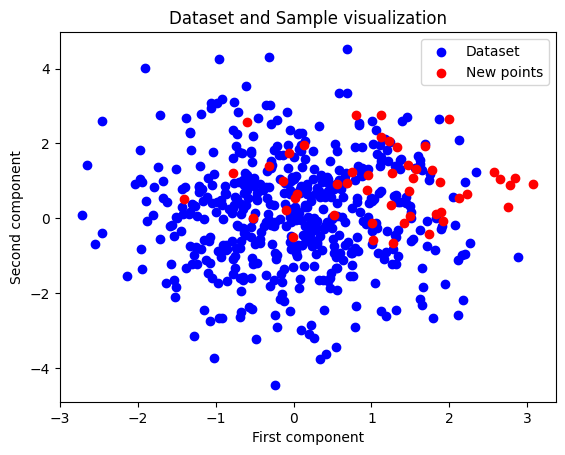

x value is set to the loaded dataset


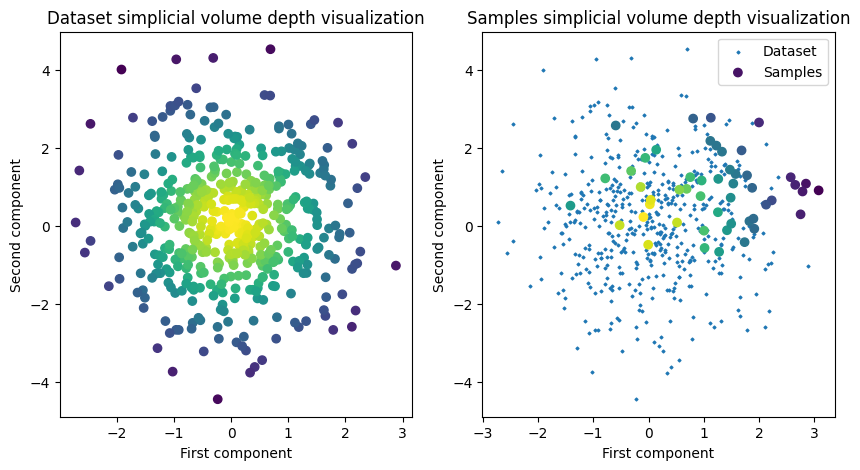

In [1]:
from depth.model.DepthEucl import DepthEucl
import numpy as np
from matplotlib import pyplot as plt
## Creating dataset and samples
np.random.seed(2801)
mat1=[[1, 0],[0, 2]]
mat2=[[1, 0],[0, 1]]
X = np.random.multivariate_normal([1,1], mat2, 50)
dataset = np.random.multivariate_normal([0,0], mat1, 500)

## visualize points
fig=plt.figure()
plt.scatter(dataset[:,0],dataset[:,1], c="blue",label="Dataset")
plt.scatter(X[:,0],X[:,1], c="red",label="New points")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Dataset and Sample visualization")
plt.legend()
plt.show()


model=DepthEucl().load_dataset(dataset)
depthX=model.simplicialVolume(X) # Compute X Depth w.r.t. the dataset
depthDataset=model.simplicialVolume(evaluate_dataset=True) # evaluate the dataset itself

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax2.scatter(dataset[:,0],dataset[:,1],s=2, label="Dataset",marker="D")
for x, depth, name, ax in zip([dataset,X],[depthDataset,depthX],
                              ["Dataset", "Samples"],[ax1,ax2]):
    ax.scatter(x[:,0],x[:,1], c=depth,label=name)
    ax.set_xlabel("First component")
    ax.set_ylabel("Second component")
    ax.set_title(f"{name} simplicial volume depth visualization")
ax2.legend()
plt.show()